Data Informasi Pribadi

* Mirza Arif Maulana
* Kijang, 04 Juni 2000
* Jl. Korindo, Prumnas Griya Indo Kencana, Kabupaten Bintan, Kepulauan Riau
* Unrika(Universitas Riau Kepulauan)
* Fakultas Teknik Elektro

# Unduh Dataset rockpaperscissors.zip Dari Dicoding

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-27 20:28:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.71MB/s    in 99s     

2021-06-27 20:30:20 (3.12 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# Mengekstrak, Menyiapkan, Mengecek, Dan Menampilkan Folder/File Untuk Data Scissors, Paper, Dan Rock



Mengekstrak Data

In [ ]:
import zipfile
import os

local_zip = '/tmp/rockpaperscissors.zip'
zip = zipfile.ZipFile(local_zip, 'r')
zip.extractall('/tmp')
zip.close()

Menyiapkan Folder

In [ ]:
folder_gunting = os.path.join('/tmp/rockpaperscissors/scissors')
folder_kertas = os.path.join('/tmp/rockpaperscissors/paper')
folder_batu = os.path.join('/tmp/rockpaperscissors/rock')

Mengecek Jumlah Gambar Disetiap File

In [ ]:
file_gunting = os.listdir(folder_gunting)
file_kertas = os.listdir(folder_kertas)
file_batu = os.listdir(folder_batu)

#menampilkan isi/jumlah gambar pada setiap file
print("Menampilkan jumlah total gambar di setiap file")
print("gunting : ", len(file_gunting), "gambar")
print("kertas : ", len(file_kertas), "gambar")
print("batu : ", len(file_batu), "gambar")

Menampilkan jumlah total gambar di setiap file
gunting :  750 gambar
kertas :  712 gambar
batu :  726 gambar


Menampilkan Beberapa Gambar

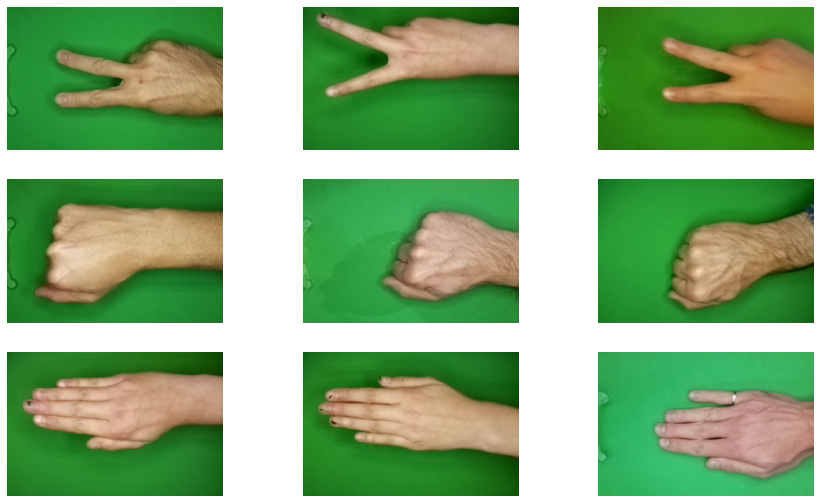

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline 
 
nrows = 3
ncols = 3
 
plc_index=0 
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 3)
plc_index +=3 

gambar_gunting = [os.path.join(folder_gunting,fname)
                  for fname in file_gunting[plc_index-3 : plc_index]]
gambar_kertas = [os.path.join(folder_kertas,fname)
                  for fname in file_kertas[plc_index-3 : plc_index]]
gambar_batu = [os.path.join(folder_batu,fname)
                  for fname in file_batu[plc_index-3 : plc_index]]
 
for i, img_path in enumerate(gambar_gunting + gambar_batu + gambar_kertas):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off') 
  img = mping.imread(img_path)
  plt.imshow(img)

plt.show()

# Memisahkan, Augmentasi Dan Pelabelan Pada Data

Import Library Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Proses Augmentasi & Pemisahan Data

In [ ]:
basis_dir = '/tmp/rockpaperscissors/rps-cv-images/'
training_datagen = ImageDataGenerator(
                   rescale = 1./255,
                   rotation_range=45, 
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.2,
                   fill_mode='nearest',
                   validation_split = 0.4
                   )

Pelabelan Pada Data

In [ ]:
#data train
train_generator = training_datagen.flow_from_directory( 
    basis_dir,
    target_size = (150,150),
    color_mode='rgb',
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
    
)
 
#data validation
validation_generator = training_datagen.flow_from_directory(
    basis_dir,
    target_size = (150,150),
    color_mode='rgb',
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Membangun Arsitektur CNN

Menggunakan Model Sequential

In [ ]:
model = tf.keras.models.Sequential([
                              
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5), 
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
        ])

#mencetak model Sequential

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

Menggunakan Fungsi Compile Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Membuat Class Callback

In [ ]:
#menggunakan callback untuk mencegah overfitting dan jika akurasi sudah terpenuhi, maka training akan dihentikan

class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') > 0.97):
        print("\nAkurasi telah mencapai 97% \nTraining dihentikan")
        self.model.stop_training = True

myCallbacks = callback()

# Melatih Dan Menguji Model

Menggunakan Metode Fit Untuk Melatih Model 

In [ ]:
history = model.fit(train_generator, 
          steps_per_epoch=25, 
          epochs=50, 
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2,
          callbacks=[myCallbacks])

Epoch 1/50
25/25 - 43s - loss: 1.1679 - accuracy: 0.3234 - val_loss: 1.0579 - val_accuracy: 0.3625
Epoch 2/50
25/25 - 42s - loss: 1.0675 - accuracy: 0.4597 - val_loss: 1.0784 - val_accuracy: 0.4187
Epoch 3/50
25/25 - 42s - loss: 1.0574 - accuracy: 0.4429 - val_loss: 1.0251 - val_accuracy: 0.4000
Epoch 4/50
25/25 - 42s - loss: 0.9376 - accuracy: 0.5714 - val_loss: 0.8942 - val_accuracy: 0.6187
Epoch 5/50
25/25 - 43s - loss: 0.8270 - accuracy: 0.6325 - val_loss: 0.7649 - val_accuracy: 0.6875
Epoch 6/50
25/25 - 46s - loss: 0.6444 - accuracy: 0.7325 - val_loss: 0.6107 - val_accuracy: 0.7937
Epoch 7/50
25/25 - 43s - loss: 0.6336 - accuracy: 0.7575 - val_loss: 0.6950 - val_accuracy: 0.6500
Epoch 8/50
25/25 - 43s - loss: 0.5476 - accuracy: 0.7912 - val_loss: 0.4710 - val_accuracy: 0.8313
Epoch 9/50
25/25 - 44s - loss: 0.4125 - accuracy: 0.8575 - val_loss: 0.3938 - val_accuracy: 0.8750
Epoch 10/50
25/25 - 44s - loss: 0.3479 - accuracy: 0.8838 - val_loss: 0.2340 - val_accuracy: 0.9500
Epoch 11/

Implementasi Akurasi Data Pada Training Dan Validasi

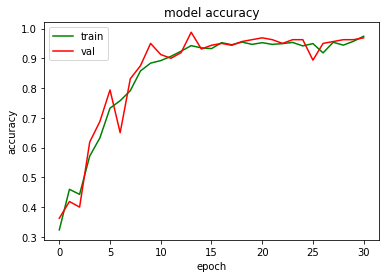

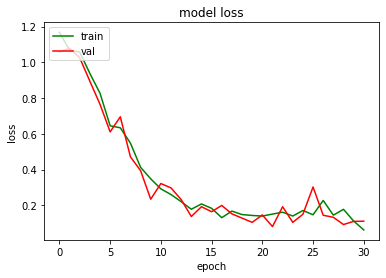

In [ ]:
import matplotlib.pyplot as plt

#menamapilkan model accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, color='green')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#menamapilkan model loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, color='green')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Uji Coba Model

Saving 20210628_002415.jpg to 20210628_002415 (1).jpg
Rock


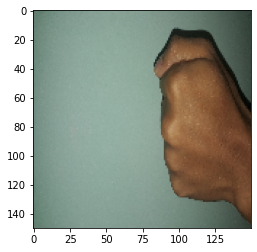

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  #memprediksi images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('Rock')
  else:
    print('scissors')